<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Company_data_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

Assignment


About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this:

# Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [ ]:
#importimg the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
#import the dataset
data= pd.read_csv('/content/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
#checking the null values
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
#checking any duplicate values
data.duplicated().sum()

0

In [ ]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# We need to convert in categorical variable

In [ ]:
# checking data type
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
# we create the dummie variable of objective columns
data1=pd.get_dummies(data,columns=['Urban','US','ShelveLoc'])
data1.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,55,11,1,0,0,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0
399,9.71,134,37,0,27,120,49,16,0,1,0,1,0,1,0


# Here we create the Sales columns into the 2 range first is 1 (1= less than 10000 dollor) and second is 2 (2= more than 10000 dollors)

In [ ]:
#Creating new columns salesin and dividing sales cols on the basic of [0,10,20] for 1 and 2
data1['Salesin']=pd.cut(data1['Sales'],bins=[0,10,20],labels=[1,2])

In [ ]:
data1.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Salesin
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0,2
396,6.14,139,23,3,37,120,55,11,1,0,0,1,0,0,1,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0,1
399,9.71,134,37,0,27,120,49,16,0,1,0,1,0,1,0,1


### Drop the Sales columns

In [ ]:
data1.drop(columns=['Sales'],axis=1, inplace=True)

In [ ]:
data1.tail()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Salesin
395,138,108,17,203,128,33,14,0,1,0,1,0,1,0,2
396,139,23,3,37,120,55,11,1,0,0,1,0,0,1,1
397,162,26,12,368,159,40,18,0,1,0,1,0,0,1,1
398,100,79,7,284,95,50,12,0,1,0,1,1,0,0,1
399,134,37,0,27,120,49,16,0,1,0,1,0,1,0,1


In [ ]:
data1.dropna(inplace=True)

In [ ]:
data1.shape

(399, 15)

## Visualization

<Axes: xlabel='CompPrice', ylabel='Count'>

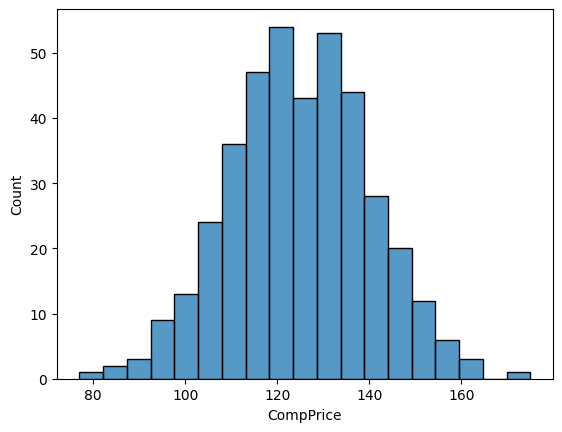

In [ ]:
sns.histplot(data1['CompPrice'])

<Axes: xlabel='Advertising', ylabel='Count'>

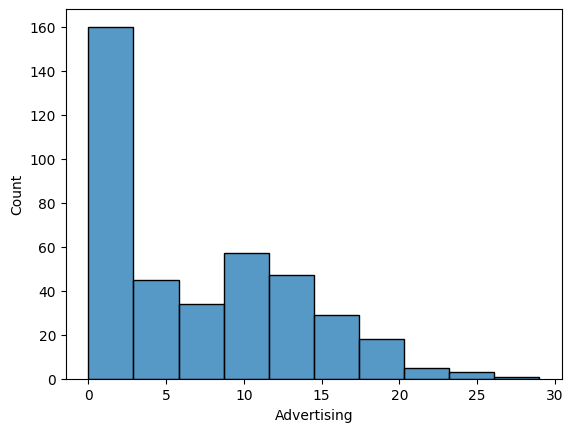

In [ ]:
sns.histplot(data1['Advertising'])

<Axes: xlabel='Price', ylabel='Count'>

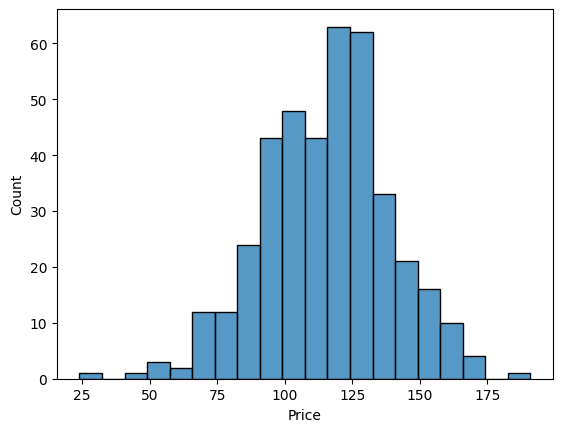

In [ ]:
sns.histplot(data1['Price'])

<Axes: xlabel='count', ylabel='Salesin'>

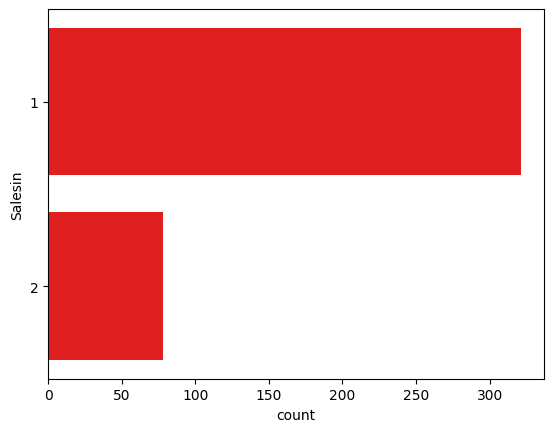

In [ ]:
sns.countplot(data1['Salesin'],color='red',label=True)

<Axes: xlabel='Population', ylabel='Count'>

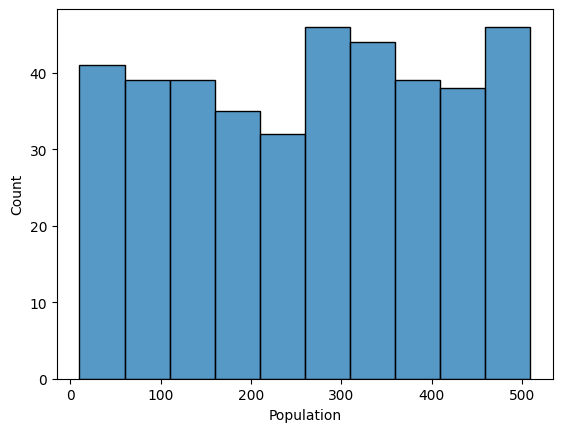

In [ ]:
sns.histplot(data1['Population'])

<Axes: xlabel='ShelveLoc', ylabel='count'>

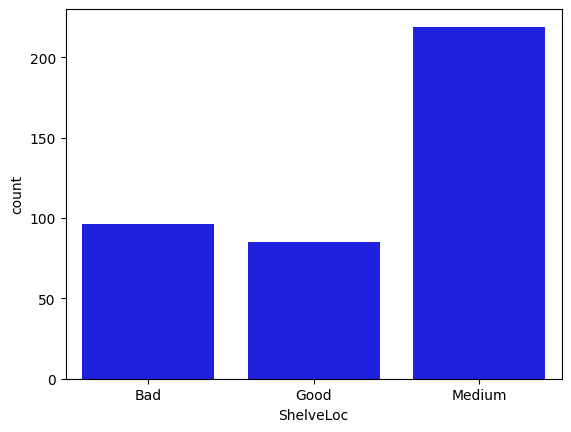

In [ ]:
sns.countplot(x=data['ShelveLoc'],data=data,color='blue')

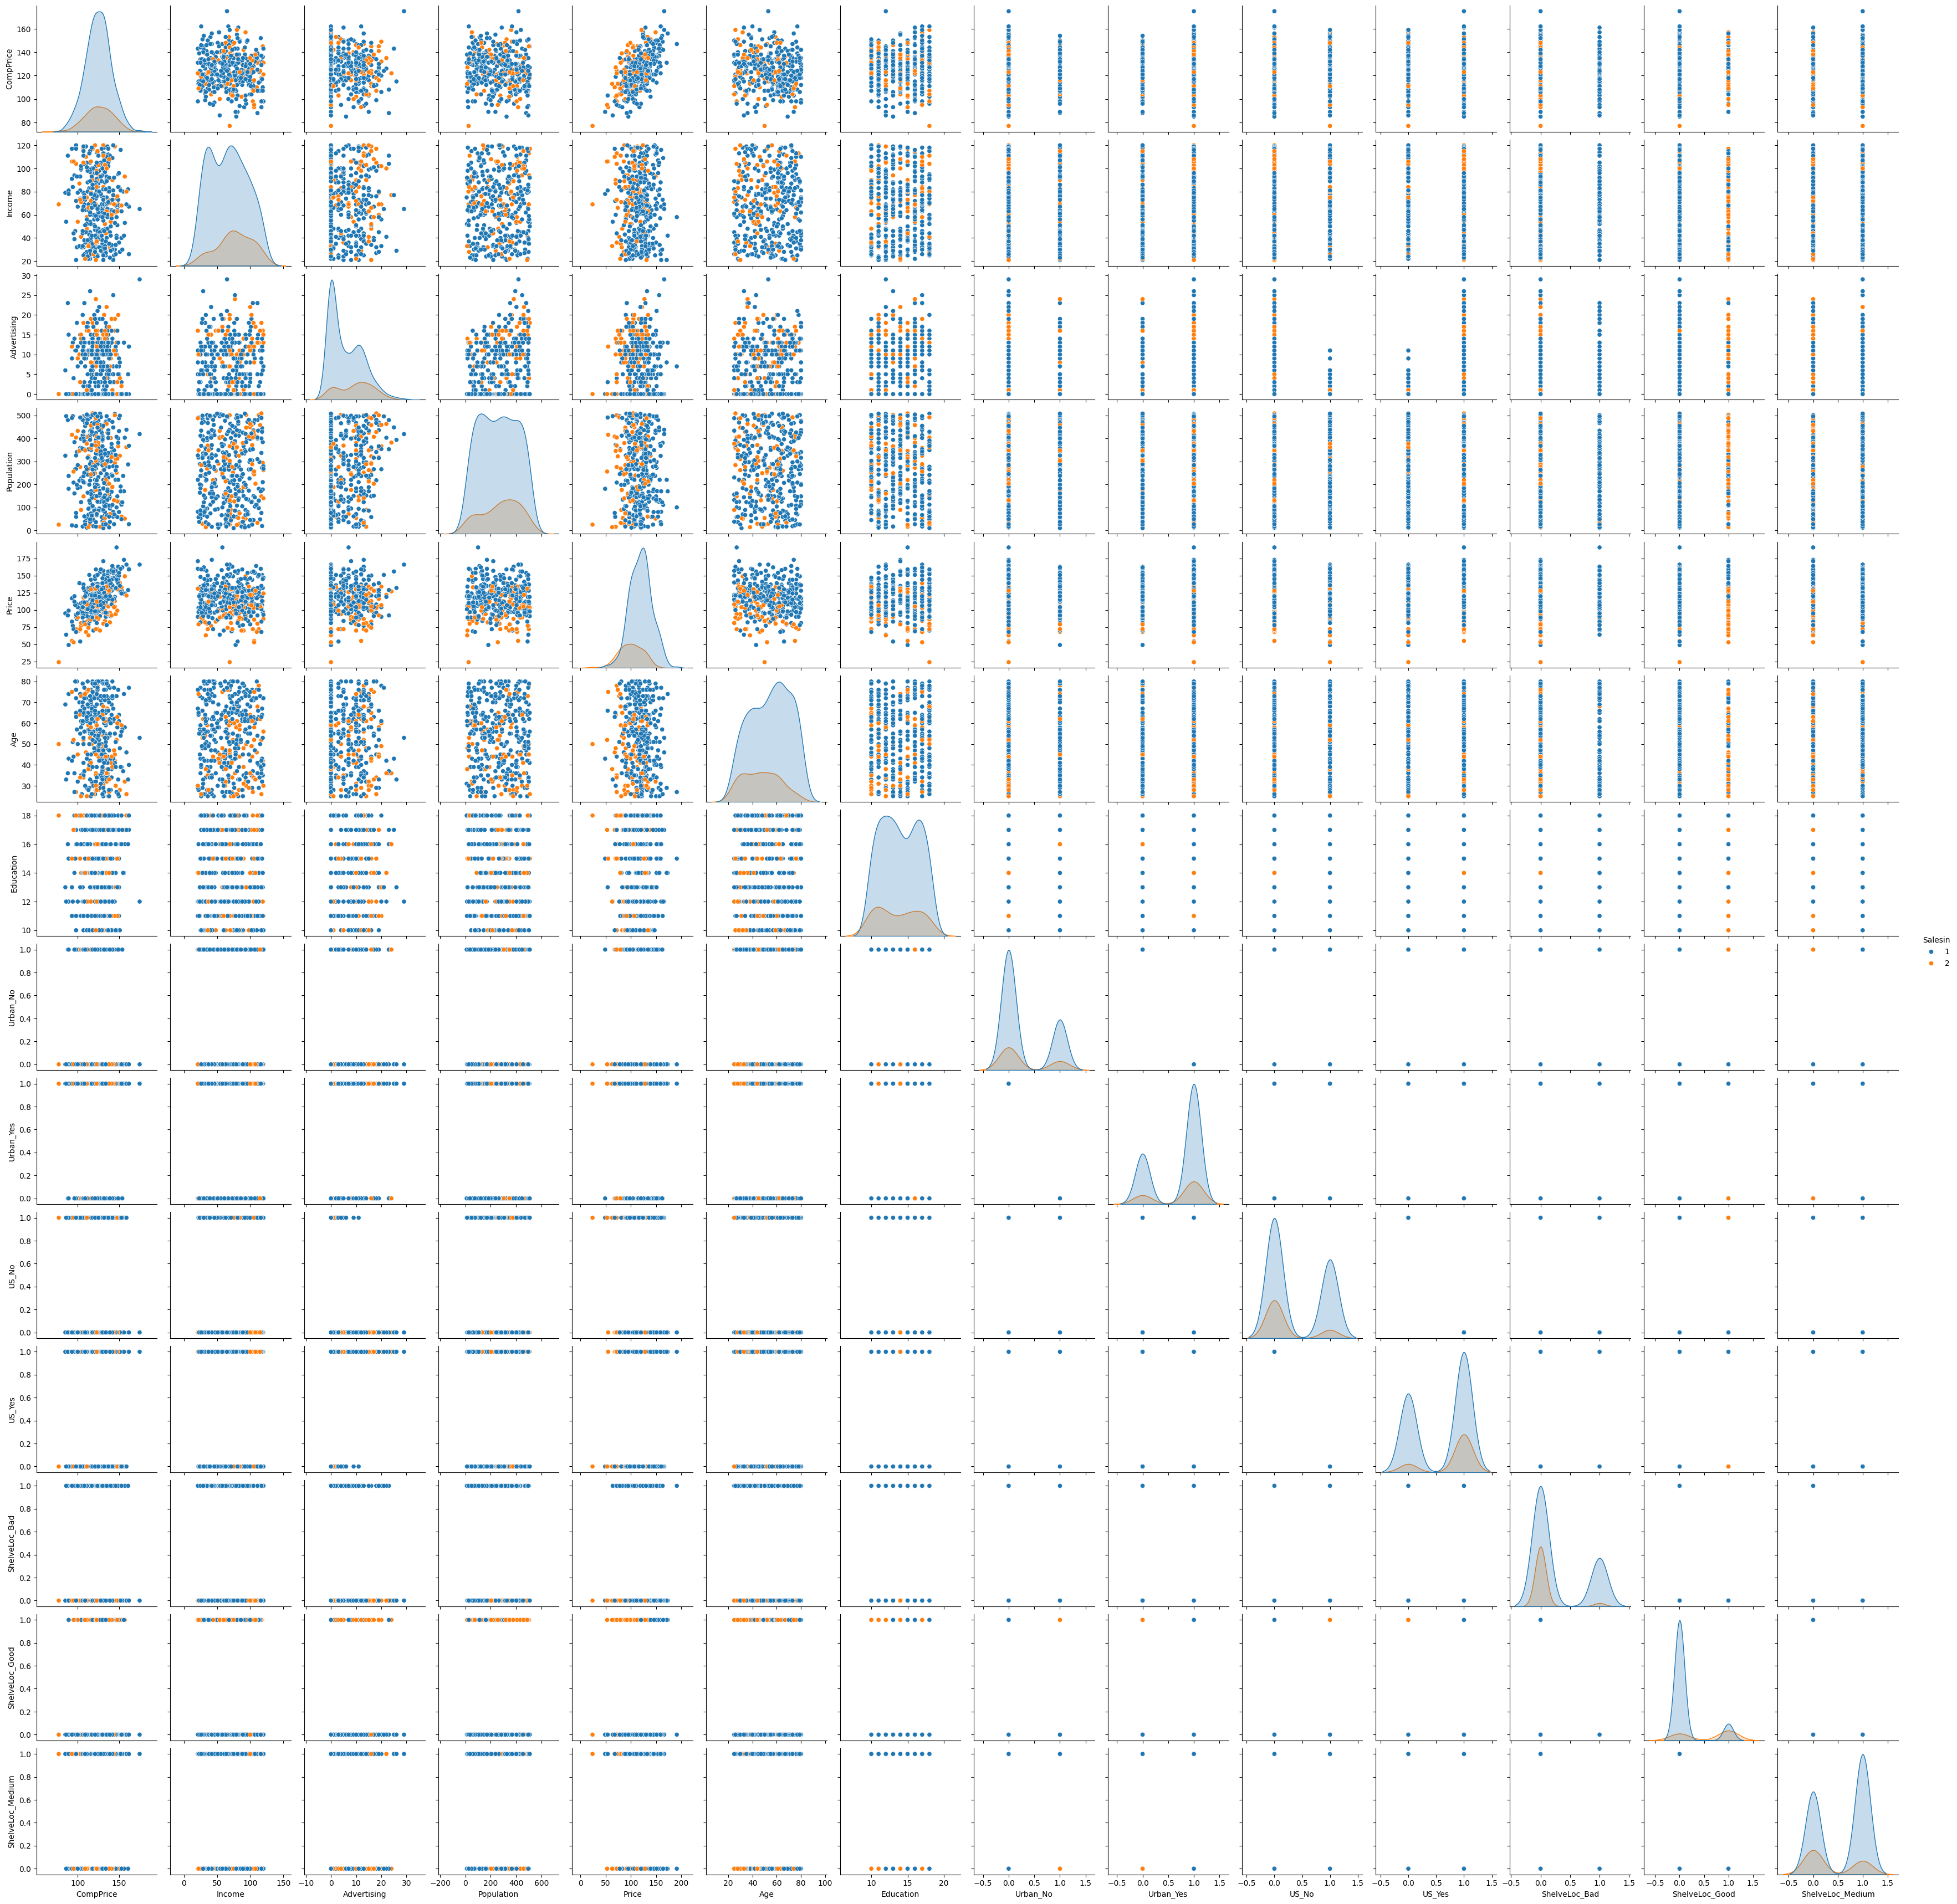

In [ ]:
sns.pairplot(data1, hue='Salesin')

## Spliting the data into X and y

In [ ]:
x=data1.drop(columns=['Salesin'], axis=1)
y=data1['Salesin']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x_train.shape

(319, 14)

In [ ]:
x_test.shape

(80, 14)

In [ ]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
### fit vs fit_transform
x_train_scaled=scaler.fit_transform(x_train)

In [ ]:
x_train_scaled

array([[-0.50248475,  1.14815557, -0.40249988, ..., -0.57855685,
        -0.52049624,  0.93032095],
       [-0.95112467,  1.5070245 , -1.0003926 , ..., -0.57855685,
         1.92124347, -1.07489786],
       [ 0.52297793,  0.71751286, -0.55197306, ..., -0.57855685,
        -0.52049624,  0.93032095],
       ...,
       [-0.88703325, -0.43086771, -1.0003926 , ..., -0.57855685,
        -0.52049624,  0.93032095],
       [ 0.58706934, -1.4715876 ,  1.69012464, ..., -0.57855685,
        -0.52049624,  0.93032095],
       [-0.75885041, -1.65102206, -1.0003926 , ..., -0.57855685,
        -0.52049624,  0.93032095]])

In [ ]:
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_test_scaled

array([[-0.18202766,  0.71751286, -0.2530267 , ..., -0.57855685,
        -0.52049624,  0.93032095],
       [-0.88703325,  1.18404246,  1.54065146, ..., -0.57855685,
        -0.52049624,  0.93032095],
       [-0.694759  , -1.07683178,  0.94275874, ..., -0.57855685,
         1.92124347, -1.07489786],
       ...,
       [ 0.65116076,  1.14815557,  2.28801736, ..., -0.57855685,
        -0.52049624,  0.93032095],
       [ 0.84343501,  1.39936382,  0.34486602, ..., -0.57855685,
        -0.52049624,  0.93032095],
       [-0.50248475,  1.79411964,  0.64381238, ..., -0.57855685,
        -0.52049624,  0.93032095]])

# Decision Tree Model

### Building decision tree classifier using Entropy criteria

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

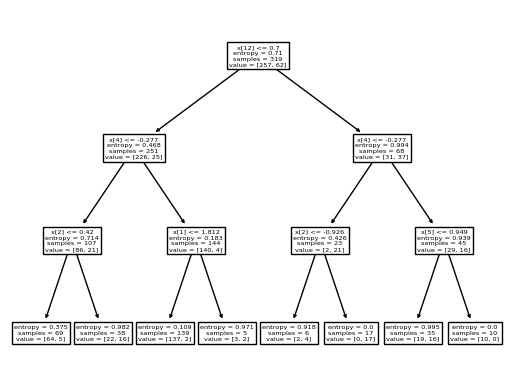

In [ ]:
#plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_12 <= 0.70
|   |--- feature_4 <= -0.28
|   |   |--- feature_2 <= 0.42
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.42
|   |   |   |--- class: 1
|   |--- feature_4 >  -0.28
|   |   |--- feature_1 <= 1.81
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.81
|   |   |   |--- class: 1
|--- feature_12 >  0.70
|   |--- feature_4 <= -0.28
|   |   |--- feature_2 <= -0.93
|   |   |   |--- class: 2
|   |   |--- feature_2 >  -0.93
|   |   |   |--- class: 2
|   |--- feature_4 >  -0.28
|   |   |--- feature_5 <= 0.95
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.95
|   |   |   |--- class: 1



In [ ]:
model.feature_importances_

array([0.        , 0.06215057, 0.17000871, 0.        , 0.29225841,
       0.07208749, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.40349482, 0.        ])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

ShelveLoc_Good      0.403495
Price               0.292258
Advertising         0.170009
Age                 0.072087
Income              0.062151
CompPrice           0.000000
Population          0.000000
Education           0.000000
Urban_No            0.000000
Urban_Yes           0.000000
US_No               0.000000
US_Yes              0.000000
ShelveLoc_Bad       0.000000
ShelveLoc_Medium    0.000000
dtype: float64

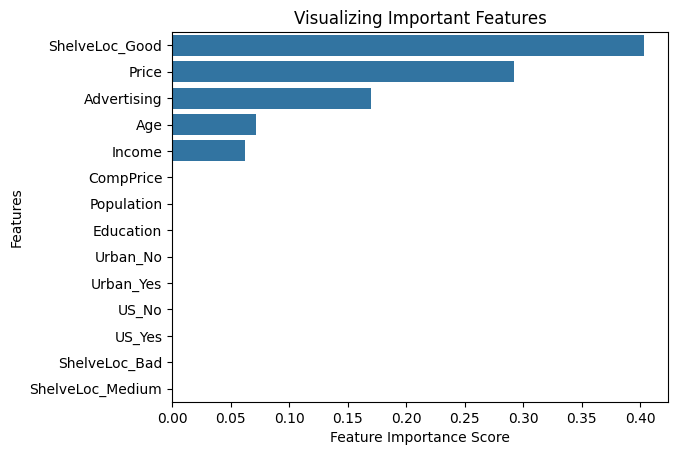

In [ ]:
#Visualize the important features

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

##Predicting on test data

In [ ]:
preds=model.predict(x_test_scaled)
pd.Series(preds)

0     1
1     1
2     1
3     1
4     1
     ..
75    1
76    1
77    1
78    1
79    1
Length: 80, dtype: int64

In [ ]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2
Salesin,,
1,63,1
2,12,4


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.8375

### Here is the Accuracy of our Model is 0.8375, its good but we can improve the model accuracy by new max_depth in decisionTreeClassifier

### We try with the max_depth= 8

In [ ]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=8)
model1.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

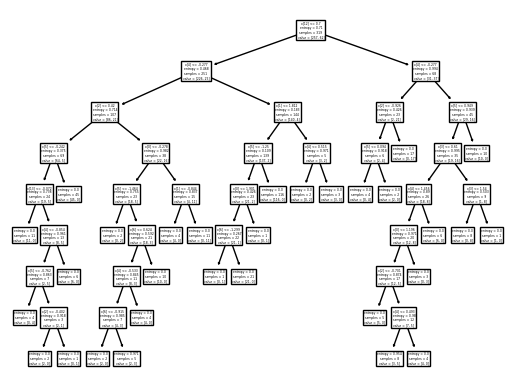

In [ ]:
#PLot the decision tree
tree.plot_tree(model1);

In [ ]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_12 <= 0.70
|   |--- feature_4 <= -0.28
|   |   |--- feature_2 <= 0.42
|   |   |   |--- feature_5 <= -0.24
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- feature_5 >  -0.24
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.42
|   |   |   |--- feature_0 <= -0.28
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- feature_0 >  -0.28
|   |   |   |   |--- truncated branch of depth 2
|   |--- feature_4 >  -0.28
|   |   |--- feature_1 <= 1.81
|   |   |   |--- feature_5 <= -1.25
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- feature_5 >  -1.25
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  1.81
|   |   |   |--- feature_2 <= 0.94
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.94
|   |   |   |   |--- class: 2
|--- feature_12 >  0.70
|   |--- feature_4 <= -0.28
|   |   |--- feature_2 <= -0.93
|   |   |   |--- feature_5 <= 0.09
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  0.09
|   |   | 

### Feature importance

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

ShelveLoc_Good      0.194392
Price               0.183925
Age                 0.161757
Advertising         0.136690
Income              0.118680
CompPrice           0.095329
Education           0.051536
Population          0.033303
ShelveLoc_Bad       0.024387
Urban_No            0.000000
Urban_Yes           0.000000
US_No               0.000000
US_Yes              0.000000
ShelveLoc_Medium    0.000000
dtype: float64

In [ ]:
# Predicting on the test Data
preds=model.predict(x_test_scaled)
pd.Series(preds)

0     1
1     1
2     1
3     1
4     1
     ..
75    1
76    1
77    1
78    1
79    1
Length: 80, dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
Salesin,,
1,60,4
2,7,9


In [ ]:
 # Accuracy
np.mean(preds==y_test)

0.8625

### Here improve the model accuracy

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

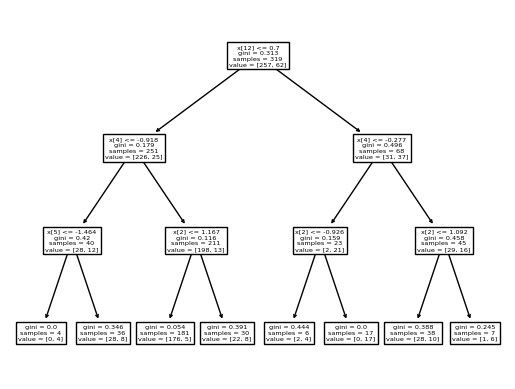

In [ ]:
#Plot the Decision Tree
tree.plot_tree(model_gini);

In [ ]:
#predicting and computing the accuracy
pred_gini=model_gini.predict(x_test)
pd.Series(pred_gini)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0     1
1     1
2     2
3     1
4     1
     ..
75    2
76    1
77    1
78    1
79    1
Length: 80, dtype: int64

In [ ]:
pd.crosstab(y_test,pred_gini)

col_0,1,2
Salesin,,
1,59,5
2,11,5


In [ ]:
model_gini.feature_importances_

array([0.        , 0.        , 0.17272939, 0.        , 0.28333218,
       0.0929079 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.45103052, 0.        ])

In [ ]:
# Accuracy
np.mean(pred_gini==y_test)*100

80.0

In [ ]:
#Accuracy score
model_gini.score(x_train_scaled,y_train)

0.8934169278996865

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model3 = DecisionTreeRegressor(max_depth = 3)
model3.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

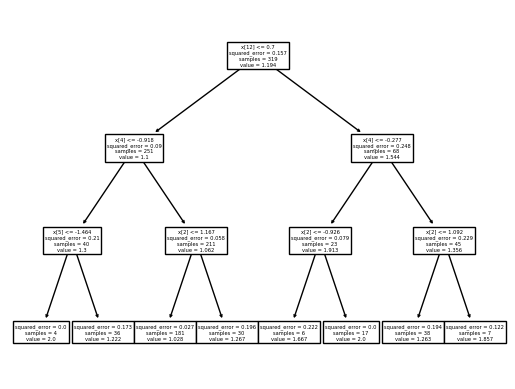

In [ ]:
tree.plot_tree(model3);

In [ ]:
# find the training accuracy
model3.score(x_train_scaled,y_train)

0.469274318901326

# Conclusion

### We perform the Decision Tree Classifier and Decision Tree Regressor on the campany dataset